In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#set path to google drive
path = "/content/drive/MyDrive/Colab Notebooks/"
#import dataset
data = pd.read_csv(path + "Titanic-Dataset.csv")
#create copy of dataset
titanic_data = data.copy()
#print information about dataset and dtypes
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#View the first 10 rows
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Drop the PassengerId, Name, Ticket columns and reset index

titanic_data= titanic_data.drop(columns=['PassengerId','Name','Ticket', 'Cabin']).reset_index(drop=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#drop missing values in the Embarked column
titanic_data = titanic_data.dropna(subset=['Embarked'])
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
# prompt: descriptive statistics of data

titanic_data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Print rows with null values in Age column
null_age = titanic_data[titanic_data['Age'].isnull()]
print(null_age)


     Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
5           0       3    male  NaN      0      0   8.4583        Q
17          1       2    male  NaN      0      0  13.0000        S
19          1       3  female  NaN      0      0   7.2250        C
26          0       3    male  NaN      0      0   7.2250        C
28          1       3  female  NaN      0      0   7.8792        Q
..        ...     ...     ...  ...    ...    ...      ...      ...
859         0       3    male  NaN      0      0   7.2292        C
863         0       3  female  NaN      8      2  69.5500        S
868         0       3    male  NaN      0      0   9.5000        S
878         0       3    male  NaN      0      0   7.8958        S
888         0       3  female  NaN      1      2  23.4500        S

[177 rows x 8 columns]


In [ ]:
# prompt: calculate percentage of null values in age column

null_age_count = titanic_data['Age'].isnull().sum()
total_rows = titanic_data.shape[0]
null_age_percentage = (null_age_count / total_rows) * 100
print("Percentage of null values in Age column:", null_age_percentage)


Percentage of null values in Age column: 19.910011248593925


In [ ]:

# Impute null values in Age column with the median
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


##Exploratory Data Analysis
#Univariate Analysis
#Distribution of the Response Variable - Survival


In [ ]:
sns.set(style='darkgrid')

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64


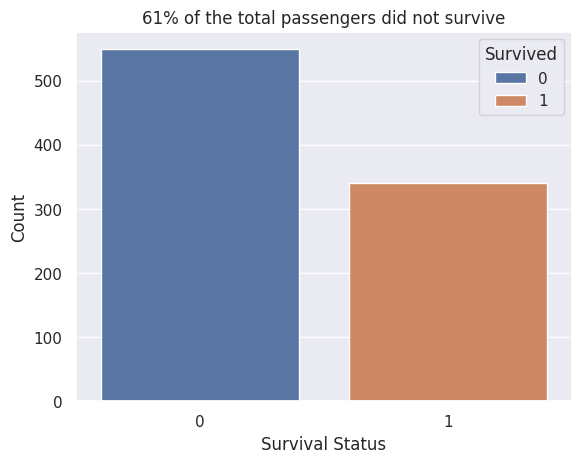

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

In [ ]:
#plot the Survival column and its distribution %
print(titanic_data['Survived'].value_counts(normalize=True))
sns.countplot(data=titanic_data, x="Survived", hue="Survived", dodge=False)
plt.title("61% of the total passengers did not survive")
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.show()


Distribution of Sex (Gender) of Passengers

Sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64


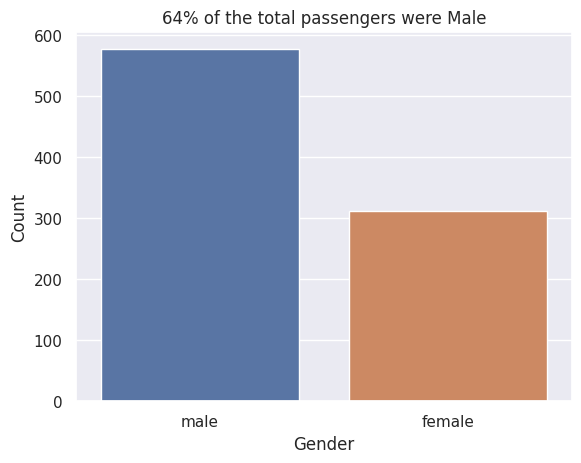

In [ ]:
# Distribution of Sex column
print(titanic_data['Sex'].value_counts(normalize=True))
sns.countplot(data=titanic_data, x="Sex", hue="Sex", dodge=False)
plt.title("64% of the total passengers were Male")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Distribution of Passengers by Ticket Class

Pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64


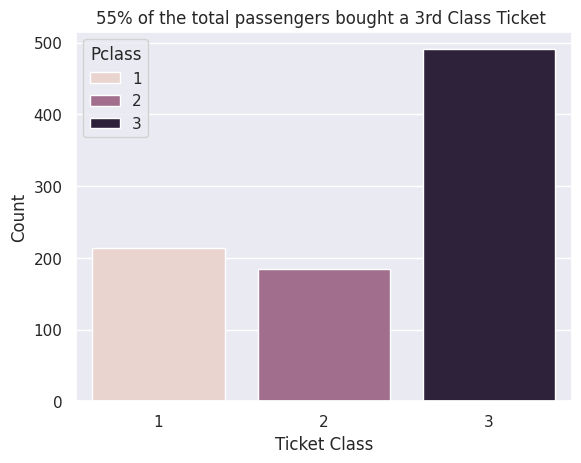

In [ ]:
# Distribution of Ticket Categories, Pclass.
print(titanic_data['Pclass'].value_counts(normalize=True))
sns.countplot(data=titanic_data, x="Pclass", hue = "Pclass")
plt.title("55% of the total passengers bought a 3rd Class Ticket ")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()


Distribution of Fare Paid by Passengers

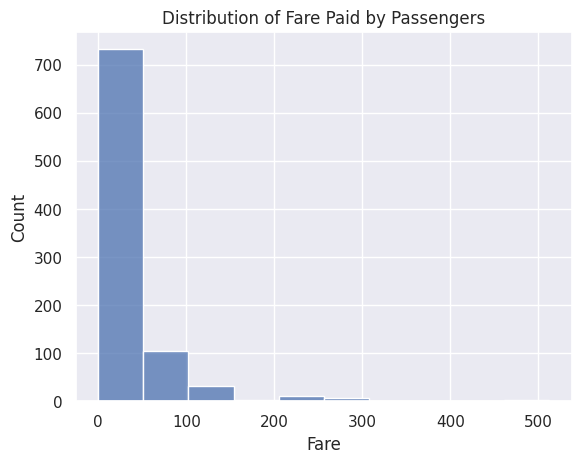

In [ ]:
#Distribution of Fare Paid by Passengers
sns.histplot(titanic_data['Fare'], bins=10)
plt.title("Distribution of Fare Paid by Passengers")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

Distribution of the Age column

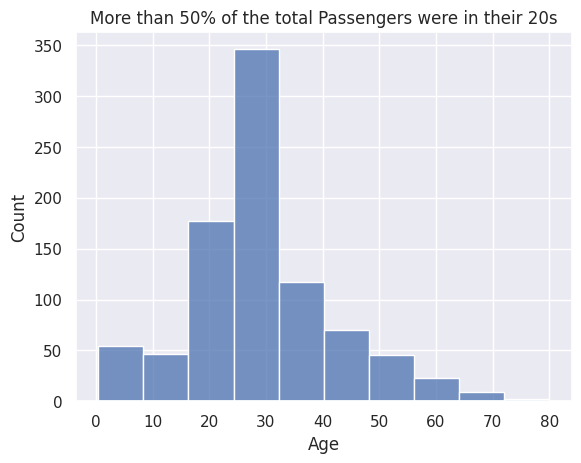

In [ ]:
# Histogram using seaborn of Age column

sns.histplot(titanic_data['Age'], bins=10)
plt.title("More than 50% of the total Passengers were in their 20s")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
#subset for rows where survival =1
survived_data = titanic_data.query("Survived == 1")

Sex
female    0.679412
male      0.320588
Name: proportion, dtype: float64


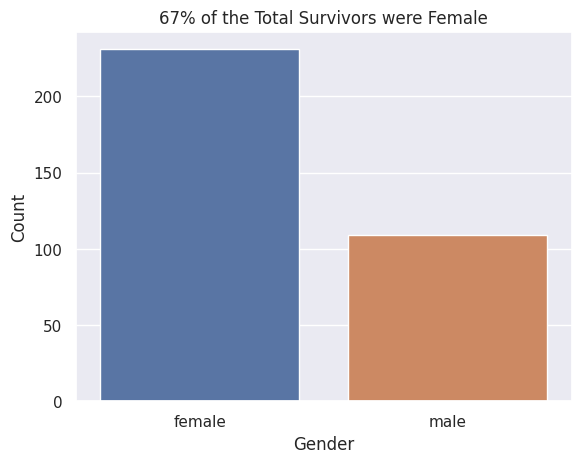

In [ ]:
# plot distribution of Survivors by sex
print(survived_data['Sex'].value_counts(normalize=True))
sns.countplot(data=survived_data, x="Sex",hue='Sex', dodge=False)
plt.title("67% of the Total Survivors were Female")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


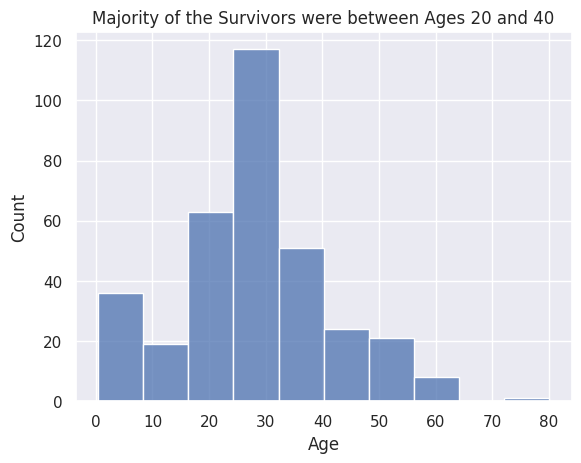

In [ ]:
# Distribution of Age, where Survival = 1

sns.histplot(data=survived_data, x="Age", bins=10)
plt.title("Majority of the Survivors were between Ages 20 and 40")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Pclass
1    0.394118
3    0.350000
2    0.255882
Name: proportion, dtype: float64


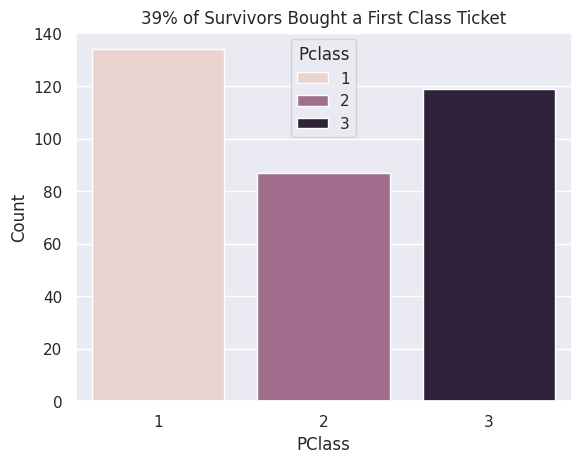

In [ ]:
# Distribution of Tickets where Survival=1
print(survived_data['Pclass'].value_counts(normalize=True))
sns.countplot(data=survived_data, x="Pclass", hue="Pclass", dodge=False)
plt.title("39% of Survivors Bought a First Class Ticket")
plt.xlabel("PClass")
plt.ylabel("Count")
plt.show()


## Model Selection and Evaluation
###Decision Tree Classifier Model

In [ ]:
#Obtain dummy variables for the Sex and Embarked columns
model_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])
model_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [ ]:
# prompt: define X and y(Survived)

X = model_data.drop('Survived', axis=1)
y = model_data['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# prompt: import libraries for a decision classifier, classification matrix as well and any other for this model, accuracy score?

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
# prompt: fit the model, accuracy score as well, and obtain predictions

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=10,  random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = model.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.8146067415730337


In [ ]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


[[94 15]
 [18 51]]


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       109
           1       0.77      0.74      0.76        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



The decision tree classifier achieved an overall accuracy score of 81.4%. For the negative class i.e. those who did not survive the disaster, the precision was 84%, while for the positive class, i.e. those who survived, the precisiom was 77%. Our model works reasonably well but there is room for improvement.

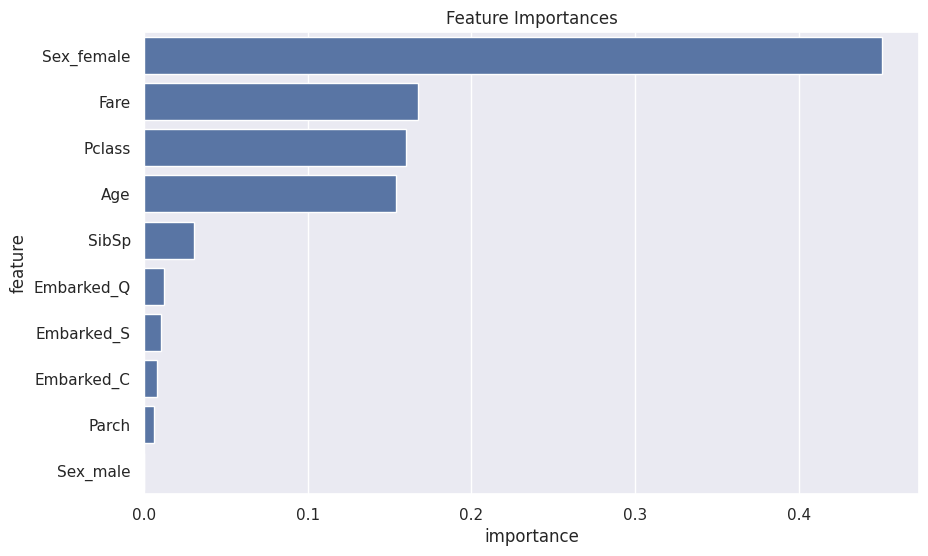

In [ ]:
# generate feature importances
importances = model.feature_importances_

# dataframe with feature names and importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()
